In [0]:
4from google.colab import drive
drive.mount('/content/gdrive')
!ln -s gdrive/'Team Drives'/'Data Mining Team'/ gdata

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link 'gdata/Data Mining Team': Function not implemented


In [0]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [0]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('gdata/yelpHotelData.db')
x1 = connection.execute("select * FROM review")

In [0]:
description = []
Class = []

data = x1.fetchmany(688329)

for x in data:
  description.append(x[3])
  Class.append(x[8])
trainData = {'Class' : Class, 'Description' : description}
df_X = pd.DataFrame(trainData)

In [0]:
#Convert NR->N , YR->Y
df_X.loc[df_X['Class'] == "NR", 'Class'] = "N"
df_X.loc[df_X['Class'] == "YR", 'Class'] = "Y"
df_X['Class'].value_counts()

N    420785
Y    267544
Name: Class, dtype: int64

In [0]:
df_X['Class'] = df_X['Class'].apply(lambda x:1 if x=='Y' else 0)

In [0]:
texts = df_X['Description'].values
labels = df_X['Class'].values

In [0]:
from keras.utils import to_categorical

In [0]:
MAX_NUM_WORDS=1000
MAX_SEQUENCE_LENGTH=100
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 322447 unique tokens.
Shape of data tensor: (688329, 100)
Shape of label tensor: (688329,)


In [0]:
labels=np.asarray(labels)

In [0]:
VALIDATION_SPLIT=0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

# x_train = data[:-nb_validation_samples]
# y_train = labels[:-nb_validation_samples]
# x_val = data[-nb_validation_samples:]
# y_val = labels[-nb_validation_samples:]

In [0]:
# #Preparing the Embedding layer

# GLOVE_DIR='../input/glove-global-vectors-for-word-representation/'

# import os
# embeddings_index = {}
# f = open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'))
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [0]:
training_samples =  550663 #  train on 75000 samples
test_samples = 137706
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples: training_samples + test_samples]
y_test = labels[training_samples: training_samples + test_samples]
print(" x_train",x_train.shape)
print(" y_train",y_train.shape)

 x_train (550663, 100)
 y_train (550663,)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop

In [0]:
max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 64,input_length = maxlen))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 681s 2ms/step - loss: 0.6242 - acc: 0.6442 - val_loss: 0.6209 - val_acc: 0.6539
Epoch 2/5
440530/440530 [==============================] - 669s 2ms/step - loss: 0.6124 - acc: 0.6566 - val_loss: 0.6071 - val_acc: 0.6600
Epoch 3/5
440530/440530 [==============================] - 665s 2ms/step - loss: 0.6080 - acc: 0.6603 - val_loss: 0.6049 - val_acc: 0.6629
Epoch 4/5
440530/440530 [==============================] - 662s 2ms/step - loss: 0.6047 - acc: 0.6640 - val_loss: 0.6034 - val_acc: 0.6639
Epoch 5/5
440530/440530 [==============================] - 660s 1ms/step - loss: 0.6021 - acc: 0.6655 - val_loss: 0.6023 - val_acc: 0.6651
CPU times: user 1h 16min 23s, sys: 5min 51s, total: 1h 22min 15s
Wall time: 55min 39s


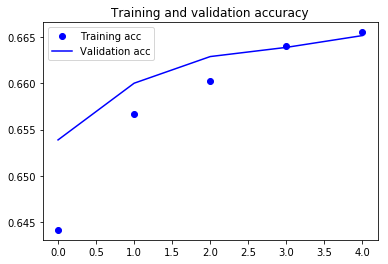

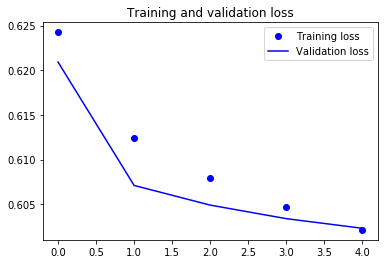

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using ')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.evaluate(x_test, y_test)


137666/137666 [==============================] - 292s 2ms/step


[0.6028158508796779, 0.6626618046576497]

In [0]:
model.save("gdata/lstm.h5")
model.metrics_names

['loss', 'acc']

In [0]:
#Model 2 - Using combination of CNN and RNN

In [0]:
model_conv = Sequential()
model_conv.add(Embedding(max_words, 128, input_length=maxlen))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=3))
model_conv.add(LSTM(128))
model_conv.add(Dense(1, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,419,969
Trainable params: 1,419,969
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model_conv.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 212s 480us/step - loss: 0.6135 - acc: 0.6536 - val_loss: 0.6179 - val_acc: 0.6468
Epoch 2/5
440530/440530 [==============================] - 206s 468us/step - loss: 0.6027 - acc: 0.6643 - val_loss: 0.6039 - val_acc: 0.6617
Epoch 3/5
440530/440530 [==============================] - 208s 472us/step - loss: 0.5964 - acc: 0.6704 - val_loss: 0.6010 - val_acc: 0.6656
Epoch 4/5
440530/440530 [==============================] - 205s 465us/step - loss: 0.5896 - acc: 0.6767 - val_loss: 0.6014 - val_acc: 0.6664
Epoch 5/5
440530/440530 [==============================] - 207s 469us/step - loss: 0.5826 - acc: 0.6835 - val_loss: 0.6036 - val_acc: 0.6644


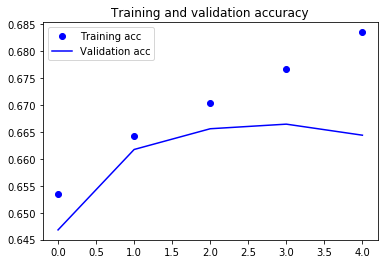

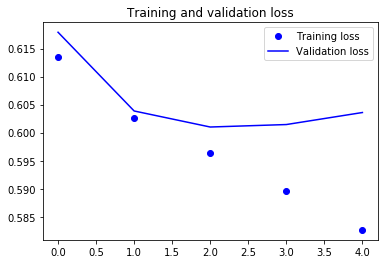

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model_conv.save("gdata/cnnrnncomb.h5")
model_conv.evaluate(x_test, y_test)


137666/137666 [==============================] - 92s 666us/step


[0.6032969587035786, 0.6639184693388346]

In [0]:
#Using bidirectional RNN's
from keras import backend as K
K.clear_session()

In [0]:
max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,543,425
Trainable params: 1,543,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 1276s 3ms/step - loss: 0.6188 - acc: 0.6509 - val_loss: 0.6201 - val_acc: 0.6336
Epoch 2/5
440530/440530 [==============================] - 1267s 3ms/step - loss: 0.6073 - acc: 0.6602 - val_loss: 0.6043 - val_acc: 0.6622
Epoch 3/5
440530/440530 [==============================] - 1269s 3ms/step - loss: 0.6017 - acc: 0.6662 - val_loss: 0.6013 - val_acc: 0.6658
Epoch 4/5
440530/440530 [==============================] - 1282s 3ms/step - loss: 0.5969 - acc: 0.6704 - val_loss: 0.6031 - val_acc: 0.6642
Epoch 5/5
440530/440530 [==============================] - 1269s 3ms/step - loss: 0.5930 - acc: 0.6745 - val_loss: 0.6019 - val_acc: 0.6653


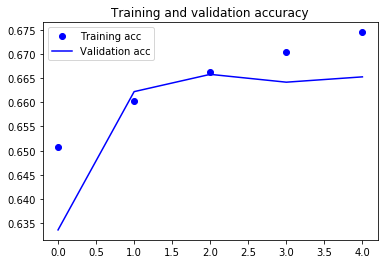

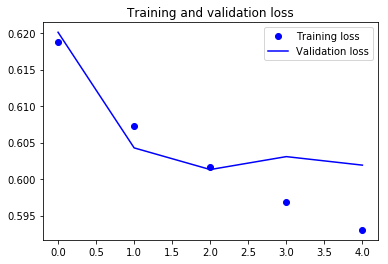

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save("gdata/BiLSTM.h5")
model.evaluate(x_test, y_test)

137666/137666 [==============================] - 571s 4ms/step


[0.6016796362765824, 0.6645213778274955]